# Land use

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np

import re
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.gridspec import GridSpec

import seaborn as sns
from adjustText import adjust_text

import jenkspy
from shapely.geometry import Polygon

In [3]:
countries = gpd.read_file('99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')
russia = gpd.read_file('osnova_2.shp')
stavr = gpd.read_file('boundaries.geojson')

stavr = (stavr
         .query('geometry.geom_type == "Polygon" | geometry.geom_type == "MultiPolygon"')
         .loc[:, ['id', 'name', 'geometry']]
        )

countries.crs = 'EPSG:4326'
russia.crs = 'EPSG:4326'
stavr.crs = 'EPSG:4326'

In [4]:
countries = countries.to_crs(epsg=32637)
russia = russia.to_crs(epsg=32637)
stavr = stavr.to_crs(epsg=32637)

In [5]:
frame_lat = [5800000, 4600000, 4600000, 5800000]
frame_lon = [0, 0, 1500000, 1500000]

frame = Polygon(zip(frame_lon, frame_lat))
frame_gdf = gpd.GeoDataFrame([1], geometry=[frame], crs = 'EPSG:32637')

In [6]:
countries_clipped = gpd.clip(countries, frame)
russia_clipped = gpd.clip(russia, frame)

countries_clipped = countries_clipped[~countries_clipped.is_empty]
russia_clipped = russia_clipped[~russia_clipped.is_empty]

## Reading data from txt

In [207]:
land_use = \
pd.read_csv('land_use_2.txt', sep=' ', header=None).applymap(lambda x: re.sub('@', ' ', str(x)))

land_use.columns = land_use.iloc[0, :]

land_use = land_use.drop(0).applymap(lambda x: re.sub(',', '.', x)).replace(['nan'], [np.nan])

In [208]:
land_use.to_excel('land_use_2_excel.xlsx', index=False, encoding='CP-1252')

In [54]:
land_use = \
land_use.melt(id_vars=['Субъекты', 'Год']).rename({0: 'type'}, axis=1)

In [55]:
land_use

,Субъекты,Год,type,value
0,Дагестан,2020,Общая площадь,5027.0
1,Ингушетия,2020,Общая площадь,362.8
2,Кабардино-Балкария,2020,Общая площадь,1247.0
3,Карачаево-Черкесия,2020,Общая площадь,1427.7
4,Северная Осетия,2020,Общая площадь,798.7
...,...,...,...,...
205,Кабардино-Балкария,2005,Прочие земли,280.4
206,Карачаево-Черкесия,2005,Прочие земли,265.2
207,Северная Осетия,2005,Прочие земли,138.5
208,Чечня,2005,Прочие земли,124.2


In [52]:
land_use_by_ownership = \
pd.read_csv('land_use_by_ownership.txt', sep=' ', header=None).applymap(lambda x: re.sub('@', ' ', str(x)))

land_use_by_ownership.columns = land_use_by_ownership.iloc[0, :]

land_use_by_ownership = land_use_by_ownership.drop(0)

In [176]:
land_use_by_ownership.to_excel('ownership.xlsx', index=False, encoding='CP-1252')

## land_use_shares

In [213]:
land_use_shares = \
pd.read_excel('agri_data.xlsx', sheet_name='доли по категориям земель').dropna(axis=1)

In [214]:
land_use_shares

,Субъекты,Год,Земли сельскохозяйственного назначения,Земли поселений,Земли промышленности и иного назначения,Земли особоохраняемых территорий и объектов,Земли лесного фонда,Земли водного фонда,Земли запасов
0,Дагестан,2006,86.562562,3.039586,0.835488,0.568928,8.428486,0.529143,0.035807
1,Ингушетия,2006,41.124587,10.556781,1.791621,0.000000,22.794928,0.165380,23.566703
2,Кабардино-Балкария,2006,48.259824,4.562951,0.769848,4.378508,20.737771,0.224539,21.066560
3,Карачаево-Черкесия,2006,57.652168,2.696645,0.637389,6.843174,27.372697,0.714436,4.083491
4,Северная Осетия,2006,44.910480,7.437085,1.990735,6.347815,21.297108,0.313009,17.816452
5,Чечня,2006,65.929571,5.886112,1.770307,0.000000,17.645555,0.556017,8.212437
6,Ставропольский край,2006,92.360943,3.683495,0.816203,0.001511,1.720073,0.840387,0.577388
7,Дагестан,2020,86.419336,3.192759,0.863338,0.572906,8.386712,0.529143,0.035807
8,Ингушетия,2020,41.593164,10.804851,1.846748,0.055127,22.794928,0.165380,22.739802
9,Кабардино-Балкария,2020,57.016840,4.643144,0.922213,4.394547,20.890136,0.224539,11.908581


In [215]:
land_use_shares.columns.tolist()

['Субъекты',
 'Год',
 'Земли сельскохозяйственного назначения',
 'Земли поселений',
 'Земли промышленности и иного назначения',
 'Земли особоохраняемых территорий и объектов',
 'Земли лесного фонда',
 'Земли водного фонда',
 'Земли запасов']

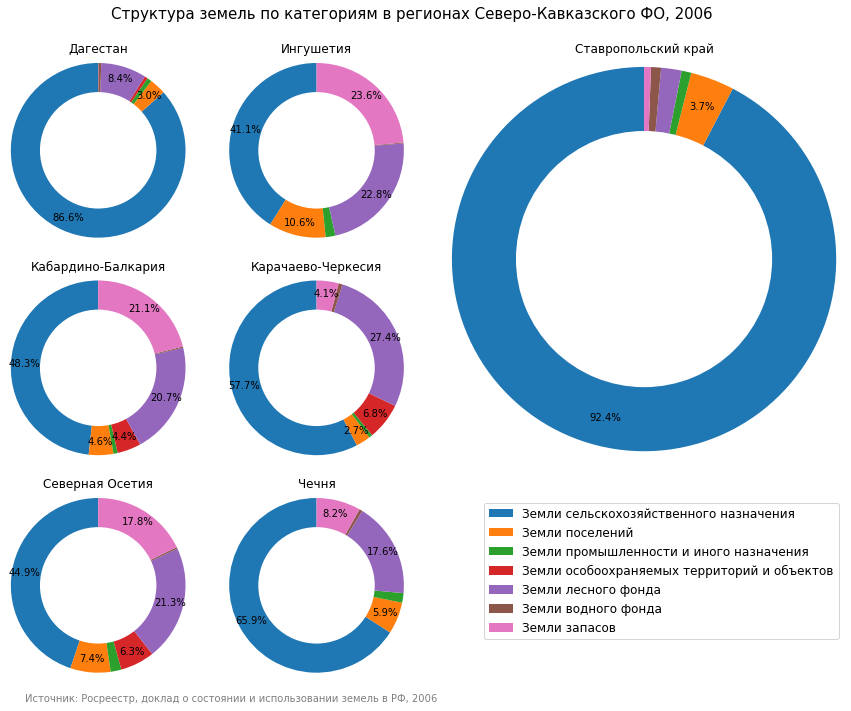

In [258]:
def smart_pct(pct, data):
    if pct > 2:
        return '{:.1f}%'.format(pct)
    return ''
    

def plot_pies(fig, df):
    
    for idx, (ax, region) in enumerate(zip(fig.axes, df['Субъекты'].tolist())):
        
        data = \
        [float(df.loc[df['Субъекты'] == region, 'Земли сельскохозяйственного назначения']),
         float(df.loc[df['Субъекты'] == region, 'Земли поселений']),
         float(df.loc[df['Субъекты'] == region, 'Земли промышленности и иного назначения']),
         float(df.loc[df['Субъекты'] == region, 'Земли особоохраняемых территорий и объектов']),
         float(df.loc[df['Субъекты'] == region, 'Земли лесного фонда']),
         float(df.loc[df['Субъекты'] == region, 'Земли водного фонда']),
         float(df.loc[df['Субъекты'] == region, 'Земли запасов']),
        ]
        
        wedges, texts, autotexts = \
        ax.pie(data,
               startangle=90,
               radius = 1.2,
               autopct = lambda pct: smart_pct(pct, data),
               pctdistance=0.85
        )
        
        ax.pie([100], colors='white', radius=0.8)
        
        ax.set_title(region)
        
        if idx == 6:
            ax.legend(wedges,
                      df.columns.tolist()[2:],
                      loc = (0.1, -0.45),
                      fontsize=12
                     )
    

fig = plt.figure(figsize=(15, 12))

gs = GridSpec(3, 4, figure=fig, hspace=0.001, wspace=0.2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[:2, -2:])

ax5.text(-1, -1.6, 'Источник: Росреестр, доклад о состоянии и использовании земель в РФ, 2006', color='grey')


plot_pies(fig, land_use_shares.query('Год == 2006'))

plt.suptitle(x=0.5, y=0.92, t='Структура земель по категориям в регионах Северо-Кавказского ФО, 2006', fontsize=15)


plt.savefig('land_use_str_2006.png', bbox_inches='tight', dpi=300)
# plt.savefig('land_use_str_2020.png', bbox_inches='tight', dpi=300)

In [225]:
cat_change = pd.read_excel('agri_data.xlsx', sheet_name='cat change')

In [227]:
cat_change.melt(id_vars='Субъекты')

,Субъекты,variable,value
0,Дагестан,Земли сельскохозяйственного назначения,-0.143227
1,Ингушетия,Земли сельскохозяйственного назначения,0.468578
2,Кабардино-Балкария,Земли сельскохозяйственного назначения,8.757017
3,Карачаево-Черкесия,Земли сельскохозяйственного назначения,-0.504308
4,Северная Осетия,Земли сельскохозяйственного назначения,7.499687
5,Чечня,Земли сельскохозяйственного назначения,-2.511664
6,Ставропольский край,Земли сельскохозяйственного назначения,-0.136034
7,Дагестан,Земли поселений,0.153173
8,Ингушетия,Земли поселений,0.248071
9,Кабардино-Балкария,Земли поселений,0.080192


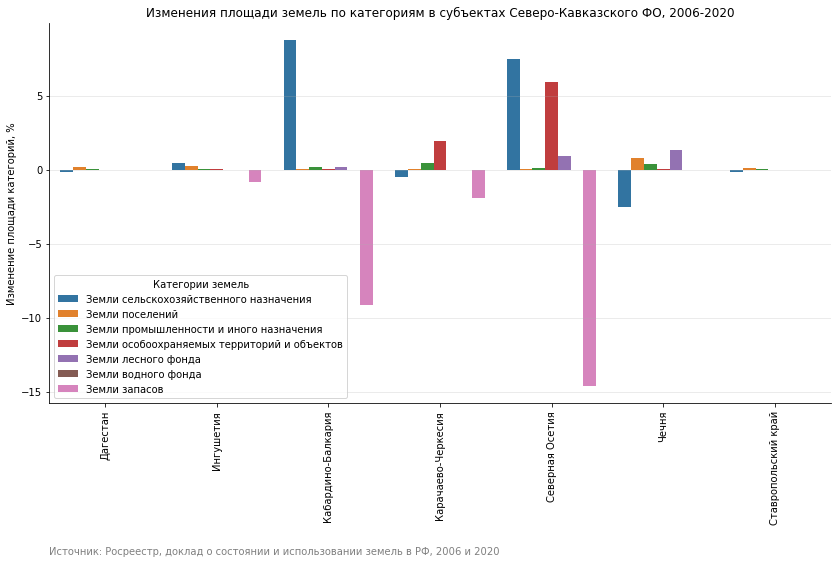

In [242]:
f, ax = plt.subplots(figsize=(14, 7))

sns.barplot(
    data = cat_change.melt(id_vars='Субъекты'),
    x = 'Субъекты',
    y = 'value',
    hue = 'variable'
)

plt.xlabel('')
plt.ylabel('Изменение площади категорий, %')
plt.xticks(rotation=90)

plt.grid(axis='y', alpha=0.3)

ax.legend(title='Категории земель')

plt.title('Изменения площади земель по категориям в субъектах Северо-Кавказского ФО, 2006-2020')

ax.text(-0.5, -26, 'Источник: Росреестр, доклад о состоянии и использовании земель в РФ, 2006 и 2020', color='grey')

sns.despine()

# plt.savefig('cat_change.png', bbox_inches='tight', dpi=300)

### land_use_by_ownership shares

In [246]:
owner_shares = pd.read_excel('agri_data.xlsx', sheet_name='доли по формам собственности')

In [247]:
owner_shares

,Субъекты,Год,Общая площадь,В собственности граждан,В собственности юридических лиц,В государственной и муниципальной собственности,В собственности РФ,В собственности субъекта,В муниципальной собственности
0,Дагестан,2020,NaN,1.113984,0.041774,98.844241,10.948876,36.397454,20.869306
1,Ингушетия,2020,NaN,3.914002,0.275634,95.810364,23.869901,4.520397,0.027563
2,Кабардино-Балкария,2020,NaN,1.499599,0.834002,97.666399,13.576584,4.635124,0.136327
3,Карачаево-Черкесия,2020,NaN,18.687399,0.518316,80.794285,23.975625,3.551166,5.939623
4,Северная Осетия,2020,NaN,1.464880,0.939026,97.596094,36.772255,5.696757,1.677726
5,Чечня,2020,NaN,1.521058,0.057519,98.421423,4.837988,13.382757,0.223685
6,Ставропольский край,2020,NaN,55.575877,11.367896,33.056227,4.891173,4.567715,2.193168
7,Дагестан,2006,NaN,0.009946,0.005968,99.984086,0.000000,0.000000,0.000000
8,Ингушетия,2006,NaN,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000
9,Кабардино-Балкария,2006,NaN,0.232558,0.000000,99.767442,0.112269,0.000000,0.000000


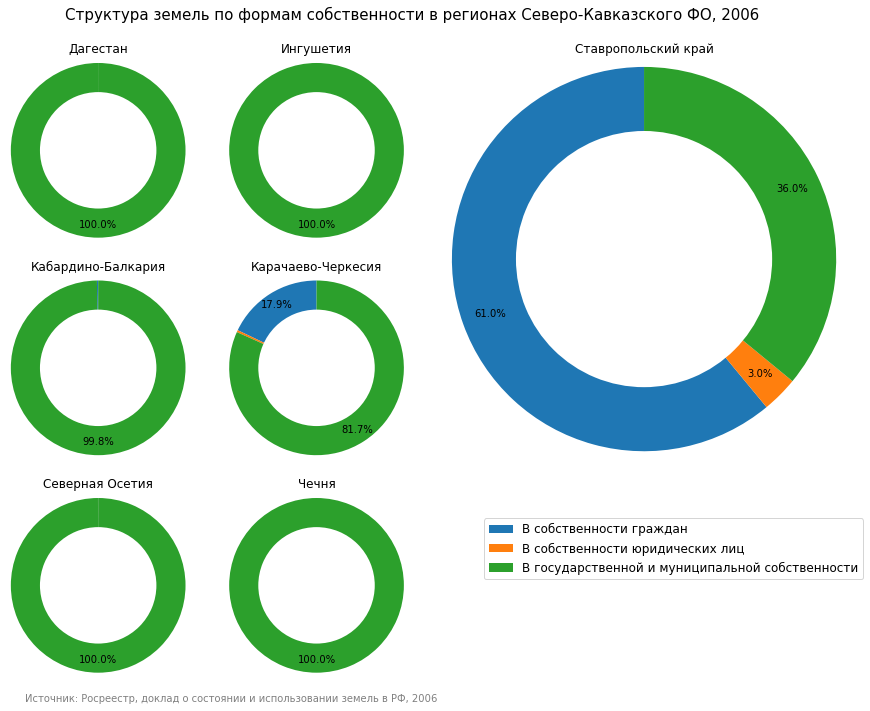

In [257]:
def smart_pct(pct, data):
    if pct > 2.5:
        return '{:.1f}%'.format(pct)
    return ''
    

def plot_pies(fig, df):
    
    for idx, (ax, region) in enumerate(zip(fig.axes, df['Субъекты'].tolist())):
        
        data = \
        [float(df.loc[df['Субъекты'] == region, :].iloc[:, 3]),
         float(df.loc[df['Субъекты'] == region, :].iloc[:, 4]),
         float(df.loc[df['Субъекты'] == region, :].iloc[:, 5])
#          float(df.loc[df['Субъекты'] == region, :].iloc[:, 7]),
#          float(df.loc[df['Субъекты'] == region, :].iloc[:, 8]),
        ]
        
        wedges, texts, autotexts = \
        ax.pie(data,
               startangle=90,
               radius = 1.2,
               autopct = lambda pct: smart_pct(pct, data),
               pctdistance=0.85
        )
        
        ax.pie([100], colors='white', radius=0.8)
        
        ax.set_title(region)
        
        if idx == 6:
            ax.legend(wedges,
                      df.iloc[:, [3, 4, 5]].columns.tolist(),
                      loc = (0.1, -0.3),
                      fontsize=12
                     )
    

fig = plt.figure(figsize=(15, 12))

gs = GridSpec(3, 4, figure=fig, hspace=0.001, wspace=0.2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[:2, -2:])

ax5.text(-1, -1.6, 'Источник: Росреестр, доклад о состоянии и использовании земель в РФ, 2006', color='grey')


plot_pies(fig, owner_shares.query('Год == 2006'))

plt.suptitle(x=0.5, y=0.92, t='Структура земель по формам собственности в регионах Северо-Кавказского ФО, 2006', fontsize=15)


plt.savefig('owner_str_2006.png', bbox_inches='tight', dpi=300)
# plt.savefig('owner_str_2020.png', bbox_inches='tight', dpi=300)

### owner change

In [251]:
owner_change = pd.read_excel('agri_data.xlsx', sheet_name = 'owner change')

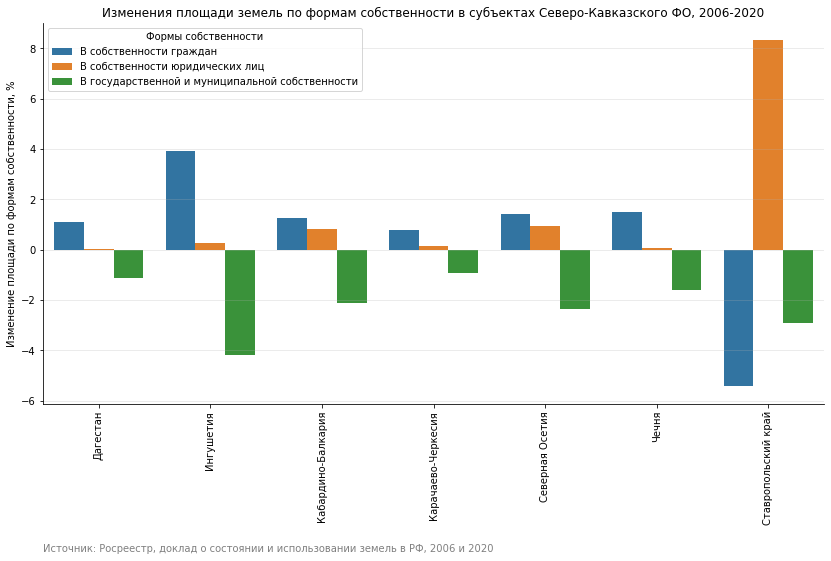

In [262]:
f, ax = plt.subplots(figsize=(14, 7))

sns.barplot(
    data = \
    (owner_change
     .melt(id_vars='Субъекты')
     .query('variable.isin(["В собственности граждан", "В собственности юридических лиц", "В государственной и муниципальной собственности"])')
    ),
    x = 'Субъекты',
    y = 'value',
    hue = 'variable'
)

plt.xlabel('')
plt.ylabel('Изменение площади по формам собственности, %')
plt.xticks(rotation=90)

plt.grid(axis='y', alpha=0.3)

ax.legend(title='Формы собственности')

plt.title('Изменения площади земель по формам собственности в субъектах Северо-Кавказского ФО, 2006-2020')

ax.text(-0.5, -12, 'Источник: Росреестр, доклад о состоянии и использовании земель в РФ, 2006 и 2020', color='grey')

sns.despine()

plt.savefig('owner_change.png', bbox_inches='tight', dpi=300)

### ownership inside gov

In [264]:
owner_gov = pd.read_excel('agri_data.xlsx', sheet_name='owner inside gov')

In [265]:
owner_gov

,Субъекты,В собственности РФ,В собственности субъекта,В муниципальной собственности,Другое
0,Дагестан,11.076898,36.823039,21.113325,30.986738
1,Ингушетия,24.913694,4.718067,0.028769,70.339471
2,Кабардино-Балкария,13.900977,4.745874,0.139585,81.213564
3,Карачаево-Черкесия,29.674902,4.395319,7.351539,58.578240
4,Северная Осетия,37.677999,5.837075,1.719051,54.765876
5,Чечня,4.915584,13.597403,0.227273,81.259740
6,Ставропольский край,14.796525,13.818016,6.634659,64.750800


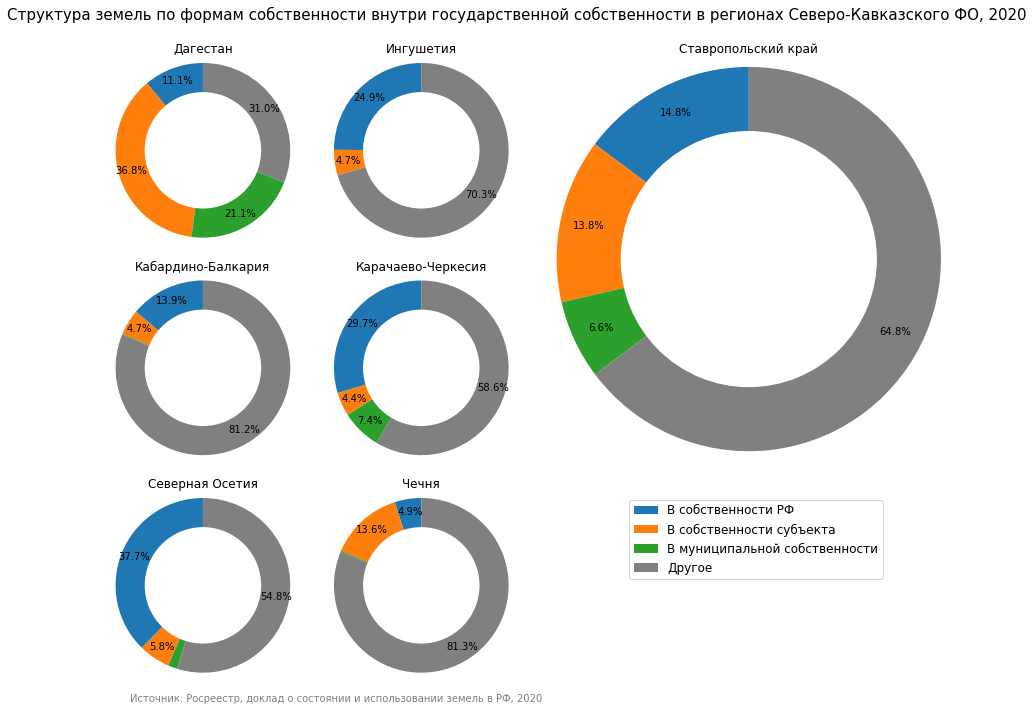

In [273]:
def smart_pct(pct, data):
    if pct > 2.5:
        return '{:.1f}%'.format(pct)
    return ''
    

def plot_pies(fig, df):
    
    for idx, (ax, region) in enumerate(zip(fig.axes, df['Субъекты'].tolist())):
        
        data = \
        [float(df.loc[df['Субъекты'] == region, :].iloc[:, 1]),
         float(df.loc[df['Субъекты'] == region, :].iloc[:, 2]),
         float(df.loc[df['Субъекты'] == region, :].iloc[:, 3]),
         float(df.loc[df['Субъекты'] == region, :].iloc[:, 4]),
#          float(df.loc[df['Субъекты'] == region, :].iloc[:, 8]),
        ]
        
        wedges, texts, autotexts = \
        ax.pie(data,
               startangle=90,
               radius = 1.2,
               autopct = lambda pct: smart_pct(pct, data),
               pctdistance=0.85,
               colors = ['tab:blue', 'tab:orange', 'tab:green', 'grey']
        )
        
        ax.pie([100], colors='white', radius=0.8)
        
        ax.set_title(region)
        
        if idx == 6:
            ax.legend(wedges,
                      df.iloc[:, [1, 2, 3, 4]].columns.tolist(),
                      loc = (0.2, -0.3),
                      fontsize=12
                     )
    

fig = plt.figure(figsize=(15, 12))

gs = GridSpec(3, 4, figure=fig, hspace=0.001, wspace=0.2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[:2, -2:])

ax5.text(-1, -1.6, 'Источник: Росреестр, доклад о состоянии и использовании земель в РФ, 2020', color='grey')


plot_pies(fig, owner_gov)

plt.suptitle(x=0.5, y=0.92, t='Структура земель по формам собственности внутри государственной собственности в регионах Северо-Кавказского ФО, 2020', fontsize=15)


plt.savefig('owner_gov_2020.png', bbox_inches='tight', dpi=300)

### agri lands by use

In [285]:
store_agri_use = []

for file in [file for file in os.listdir(os.getcwd()) if 'agri_use_dynamics' in file]:
    
    agri_use = \
    pd.read_csv(file, sep=' ', header=None).applymap(lambda x: re.sub('@', ' ', str(x)))
    
    store_agri_use.append(agri_use)
    
agri_use_dynamics = pd.concat(store_agri_use)

In [286]:
agri_use_dynamics

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,всего,nan,nan,nan,пашня,nan,nan,nan,залежь,nan,nan,nan,многолетние насаждения,nan,nan,nan,кормовые угодья,nan,nan,nan
1,2005,2004,2003,2002,2005,2004,2003,2002,2005,2004,2003.0,2002,2005,2004,2003,2002,2005,2004,2003,2002
2,"5787,9","5789,9","5786,5","5783,8","3994,2","3994,9","3991,2","3992,2","14,7","14,7",15.0,"14,9","45,1","45,2","45,2","45,8","1733,9","1735,1","1735,1","1730,9"
0,всего,nan,nan,nan,пашня,nan,nan,nan,залежь,nan,nan,nan,многолетние насаждения,nan,nan,nan,кормовые угодья,nan,nan,nan
1,2009,2008,2007.0,2006,2009,2008,2007,2006,2009,2008,2007,2006,2009,2008,2007,2006,2009,2008,2007,2006
2,"5787,6","5787,9",5787.0,"5787,9","3994,6","3995,1","3994,6","3994,2","14,5","14,6","14,7","14,7","44,5","44,1","43,9","45,1",1734,"1734,1","1733,8","1733,9"
0,всего,nan,nan,nan,пашня,nan,nan,nan,залежь,nan,nan,nan,многолетние насаждения,nan,nan,nan,кормовые угодья,nan,nan,nan
1,2013,2012,2011,2010,2013,2012,2011,2010,2013,2012,2011,2010,2013,2012,2011,2010.0,2013,2012,2011,2010
2,"5787,2","5786,9","5786,9","5787,3","3998,9","3997,7","3996,4","3995,7","14,1","14,1","14,1","14,3","43,5","43,7","43,6",44.0,"1730,7","1731,4","1732,8","1733,3"
0,всего,nan,nan,nan,пашня,nan,nan,nan,залежь,nan,nan,nan,многолетние насаждения,nan,nan,nan,кормовые угодья,nan,nan,nan


In [287]:
agri_use_dynamics.to_excel('agri_use_dynamics_excel.xlsx', index=False, encoding='CP-1252')

In [7]:
agri_use = pd.read_excel('agri_data.xlsx', sheet_name='agri_types').T.reset_index()

agri_use.columns = agri_use.iloc[0, :]

agri_use = agri_use.drop(0).reset_index(drop=True).rename({'type': 'year'}, axis=1)

In [8]:
agri_use.melt(id_vars='year').rename({0: 'type'}, axis=1)

,year,type,value
0,2019,всего,5787.6
1,2018,всего,5787.6
2,2017,всего,5787.5
3,2016,всего,5787.4
4,2015,всего,5787.4
...,...,...,...
85,2006,кормовые угодья,1733.9
86,2005,кормовые угодья,1733.9
87,2004,кормовые угодья,1735.1
88,2003,кормовые угодья,1735.1


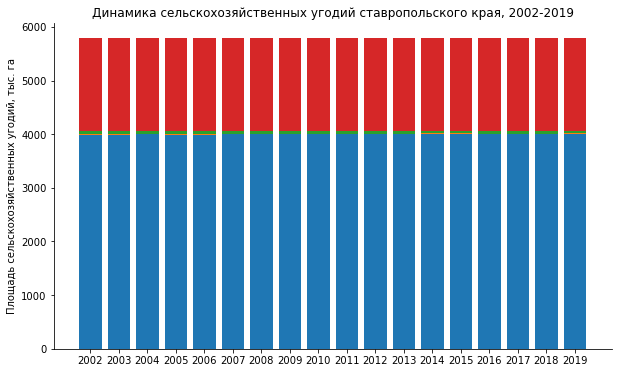

In [9]:
f, ax = plt.subplots(figsize=(10, 6))

ax.bar(
    agri_use.year.sort_values(),
    agri_use.sort_values(by='year')['пашня'],
    label = 'Пашня'
)

ax.bar(
    agri_use.year.sort_values(),
    agri_use.sort_values(by='year')['залежь'],
    label = 'Залежь',
    bottom = agri_use.sort_values(by='year')['пашня']
)

ax.bar(
    agri_use.year.sort_values(),
    agri_use.sort_values(by='year')['многолетние насаждения'],
    label = 'Многолетние насаждения',
    bottom = agri_use.sort_values(by='year')['пашня'] + agri_use.sort_values(by='year')['залежь']
)

ax.bar(
    agri_use.year.sort_values(),
    agri_use.sort_values(by='year')['кормовые угодья'],
    label = 'Кормовые угодья',
    bottom = \
    agri_use.sort_values(by='year')['пашня'] + \
    agri_use.sort_values(by='year')['залежь'] + \
    agri_use.sort_values(by='year')['многолетние насаждения']
)

plt.xticks(ticks = range(2002, 2020), label = range(2002, 2020, 2))
plt.ylabel('Площадь сельскохозяйственных угодий, тыс. га')
plt.title('Динамика сельскохозяйственных угодий ставропольского края, 2002-2019')

sns.despine()

# ax.set_ylim(3900, 4200)

In [ ]:
agri_use

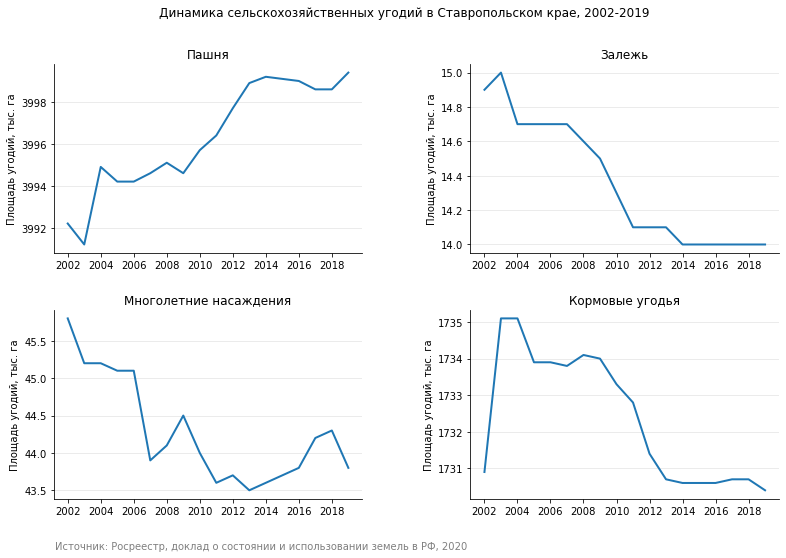

In [20]:
def plot_lines(fig, data):
    
    for a, col in zip(fig.axes, data.columns.tolist()[1:]):
        
        a.plot(
            data.year.sort_values(),
            data.sort_values(by='year')[col],
            linewidth = 2
        )
        
        a.set_ylabel('Площадь угодий, тыс. га')
        a.set_title(col.capitalize())
        a.grid(axis='y', alpha=0.3)
        
        a.set_xticks(range(2002, 2020, 2))
        a.set_xticklabels(range(2002, 2020, 2))
        
        sns.despine()
        
        
    
    
    
f, ax = plt.subplots(2, 2, figsize=(13, 8))

data = agri_use.drop('всего', axis=1).astype('float64')

plot_lines(f, data)
plt.subplots_adjust(hspace = 0.3, wspace = 0.35)

plt.suptitle('Динамика сельскохозяйственных угодий в Ставропольском крае, 2002-2019')

plt.text(1976, 1728.8, 'Источник: Росреестр, доклад о состоянии и использовании земель в РФ, 2020', color='grey')


# plt.savefig('agri_use_dynamics_stavr.png', bbox_inches='tight', dpi=300)

In [49]:
agri_change = pd.read_excel('agri_data.xlsx', sheet_name='agri_types_change')

In [50]:
agri_change

,type,change
0,всего,0.000657
1,пашня,0.001804
2,залежь,-0.060403
3,многолетние насаждения,-0.043668
4,кормовые угодья,-0.000289


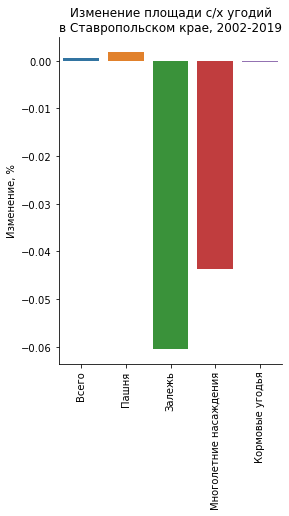

In [259]:
f, ax = plt.subplots(figsize=(4, 6))

sns.barplot(
    data = agri_change,
    x = 'type',
    y = 'change'
)

plt.ylabel('Изменение, %')
plt.xlabel('')
plt.xticks(ticks = range(0, 5),
           labels = [item.capitalize() for item in agri_change.type.unique().tolist()],
           rotation=90)

plt.title('Изменение площади с/х угодий\nв Ставропольском крае, 2002-2019')

sns.despine()

# plt.savefig('agri_use_change.png', bbox_inches='tight', dpi=300)

### agri use str by neighbours

In [181]:
agri_str = pd.read_excel('agri_data.xlsx', sheet_name='agri_use_str')

In [22]:
agri_str

,region,Всего,Пашня,Залежь,Многолетние насаждения,Кормовые угодья
0,Дагестан,3348.2,520.1,4.8,72.4,2750.9
1,Ингушетия,222.0,111.0,0.0,4.7,106.3
2,Кабардино-Балкария,695.7,299.3,0.0,31.5,364.9
3,Карачаево-Черкесия,663.7,161.0,3.8,4.9,494.0
4,Северная Остеия,400.8,201.1,0.4,6.4,192.9
5,Чечня,974.6,332.3,0.2,10.8,631.3
6,Ставропольский край,5787.6,3999.4,14.0,43.8,1730.4


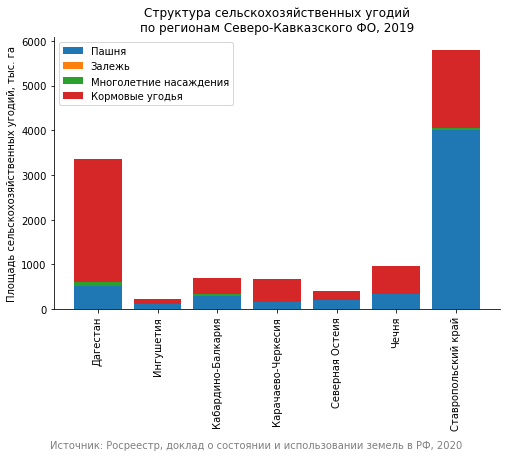

In [189]:
f, ax = plt.subplots(figsize=(8, 5))

ax.bar(
    agri_str.region,
    agri_str['Пашня'],
    label = 'Пашня'
)

ax.bar(
    agri_str.region,
    agri_str['Залежь'],
    bottom = agri_str['Пашня'],
    label = 'Залежь'
)

ax.bar(
    agri_str.region,
    agri_str['Многолетние насаждения'],
    bottom = agri_str['Пашня'] + agri_str['Залежь'],
    label = 'Многолетние насаждения'
)

ax.bar(
    agri_str.region,
    agri_str['Кормовые угодья'],
    bottom = agri_str['Пашня'] + agri_str['Залежь'] + agri_str['Многолетние насаждения'],
    label = 'Кормовые угодья'
)


plt.xticks(rotation=90)
plt.ylabel('Площадь сельскохозяйственных угодий, тыс. га')
plt.title('Структура сельскохозяйственных угодий\nпо регионам Северо-Кавказского ФО, 2019')

plt.text(-0.8, -3100, 'Источник: Росреестр, доклад о состоянии и использовании земель в РФ, 2020', color='grey')

sns.despine()

plt.legend()

# plt.savefig('agri_str_abs.png', bbox_inches='tight', dpi=300)

### melioration

In [71]:
meli = pd.read_excel('agri_data.xlsx', sheet_name='mel').dropna(axis=1)

In [72]:
meli

,region,Всего,Хорошее,Удовлетворительное,Неудовлитворительное,type
0,Дагестан,395.6,83.0,101.1,211.5,Орошаемые
1,Ингушетия,23.1,2.6,1.9,18.6,Орошаемые
2,Кабардино-Балкария,130.8,55.3,62.1,13.4,Орошаемые
3,Карачаево-Черкесия,19.9,19.8,0.1,0.0,Орошаемые
4,Северная Осетия,77.2,0.0,41.3,35.9,Орошаемые
5,Чечня,136.7,8.5,40.0,88.2,Орошаемые
6,Ставропольский край,214.3,162.6,32.6,19.1,Орошаемые
7,Дагестан,0.0,0.0,0.0,0.0,Осушаемые
8,Ингушетия,0.0,0.0,0.0,0.0,Осушаемые
9,Кабардино-Балкария,0.3,0.0,0.0,0.3,Осушаемые


<ipython-input-122-119b2cb27e86>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels = data_1.region, rotation=90)
<ipython-input-122-119b2cb27e86>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels = data_2.region, rotation=90)


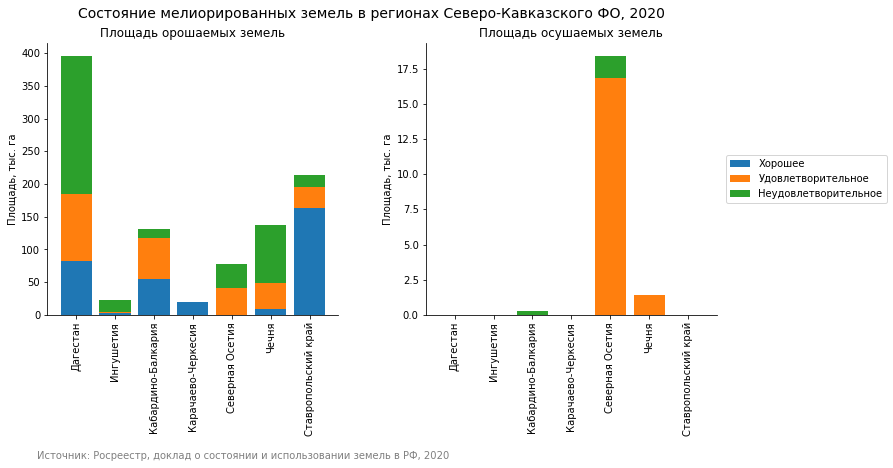

In [122]:
data_1 = meli.loc[meli.type == 'Орошаемые', ['region', 'Хорошее', 'Удовлетворительное', 'Неудовлитворительное']]
data_2 = meli.loc[meli.type == 'Осушаемые', ['region', 'Хорошее', 'Удовлетворительное', 'Неудовлитворительное']]

f, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(
    data_1.region,
    data_1['Хорошее']
)

ax[0].bar(
    data_1.region,
    data_1['Удовлетворительное'],
    bottom = data_1['Хорошее']
)

ax[0].bar(
    data_1.region,
    data_1['Неудовлитворительное'],
    bottom = data_1['Хорошее'] + data_1['Удовлетворительное']
)

ax[0].set_xticklabels(labels = data_1.region, rotation=90)
ax[0].set_ylabel('Площадь, тыс. га')
ax[0].set_title('Площадь орошаемых земель')

ax[0].text(-1, -220, 'Источник: Росреестр, доклад о состоянии и использовании земель в РФ, 2020', color='grey')



ax[1].bar(
    data_2.region,
    data_2['Хорошее'],
    label = 'Хорошее'
)

ax[1].bar(
    data_2.region,
    data_2['Удовлетворительное'],
    bottom = data_2['Хорошее'],
    label = 'Удовлетворительное'
)

ax[1].bar(
    data_2.region,
    data_2['Неудовлитворительное'],
    bottom = data_2['Хорошее'] + data_2['Удовлетворительное'],
    label = 'Неудовлетворительное'
)

ax[1].set_xticklabels(labels = data_2.region, rotation=90)
ax[1].set_ylabel('Площадь, тыс. га')
ax[1].set_title('Площадь осушаемых земель')


plt.legend(loc = 'center right', bbox_to_anchor = (1.6, 0.5))
plt.subplots_adjust(wspace=0.3)

plt.suptitle('Состояние мелиорированных земель в регионах Северо-Кавказского ФО, 2020', fontsize=14)

sns.despine()

plt.savefig('melioration.png', bbox_inches='tight', dpi=300)

### crops dynamics

In [125]:
crops_dyn = pd.read_excel('agri_data.xlsx', sheet_name='crops dynamics')

In [126]:
crops_dyn

,year,Зерновые,Сахарная свекла,Подсолнечник,Картофель,Овощи
0,2010,2146.4,31.9,245.4,21.8,16.6
1,2011,2151.5,41.1,270.6,21.6,19.1
2,2012,2141.3,36.5,291.2,21.3,20.2
3,2013,2293.0,24.9,268.3,19.7,24.5
4,2014,2299.5,29.0,237.5,17.9,19.8
5,2015,2362.0,33.9,258.4,16.8,16.5
6,2016,2431.3,37.3,270.3,15.7,15.1
7,2017,2419.8,38.3,323.0,14.1,15.2
8,2018,2469.8,34.9,321.0,14.0,16.5
9,2019,2523.7,35.4,304.8,13.7,17.1


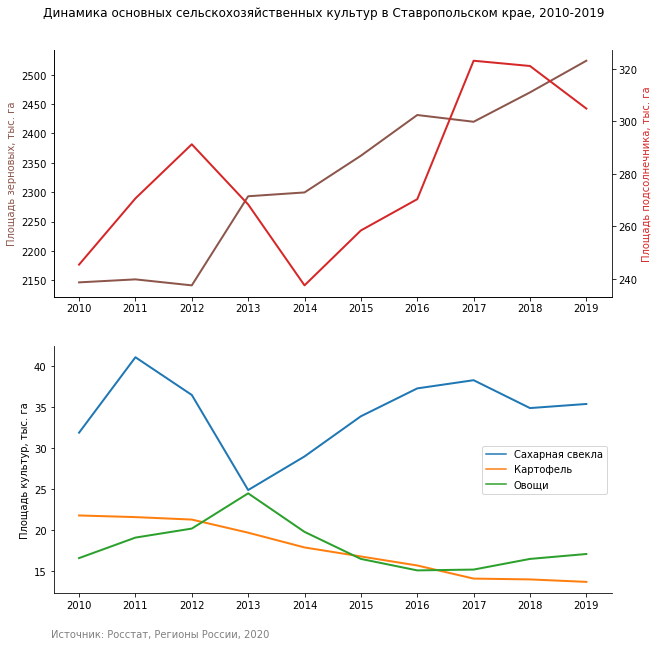

In [157]:
f, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].plot(crops_dyn.year,
           crops_dyn['Зерновые'],
           linewidth = 2,
           color = 'tab:brown'
          )


ax[0].set_xlabel('')
ax[0].set_ylabel('Площадь зерновых, тыс. га', color='tab:brown')

ax[0].set_xticks(range(2010, 2020))
ax[0].set_xticklabels(range(2010, 2020))

ax_sunfl = ax[0].twinx()
ax_sunfl.plot(crops_dyn.year,
              crops_dyn['Подсолнечник'],
              linewidth = 2,
              color = 'tab:red'
             )
ax_sunfl.set_ylabel('Площадь подсолнечника, тыс. га', color = 'tab:red')

sns.despine(ax=ax[0])
sns.despine(ax=ax_sunfl, right=False)



data = crops_dyn.melt(id_vars='year').query('variable.isin(["Сахарная свекла", "Картофель", "Овощи"])')

sns.lineplot(
    data = data,
    x = 'year',
    y = 'value',
    hue = 'variable',
    linewidth = 2,
    ax = ax[1]
)

ax[1].set_xlabel('')
ax[1].set_ylabel('Площадь культур, тыс. га')

ax[1].set_xticks(range(2010, 2020))
ax[1].set_xticklabels(range(2010, 2020))

ax[1].legend(title='')
sns.despine(ax=ax[1])

ax[1].text(2009.5, 7, 'Источник: Росстат, Регионы России, 2020', color='grey')

plt.suptitle('Динамика основных сельскохозяйственных культур в Ставропольском крае, 2010-2019', x=0.5, y=0.94)

# plt.savefig('crops_dynamics_stavr.png', bbox_inches='tight', dpi=300)

### par

In [159]:
par = pd.read_excel('agri_data.xlsx', sheet_name='par')

In [160]:
par

,region,2005,2019
0,Дагестан,204.7,168.5
1,Ингушетия,58.3,45.0
2,Кабардино-Балкария,17.4,17.5
3,Карачаево-Черкесия,551.9,32.4
4,Северная Осетия,10.5,31.1
5,Чечня,175.4,55.9
6,Ставропольский край,1257.4,842.8


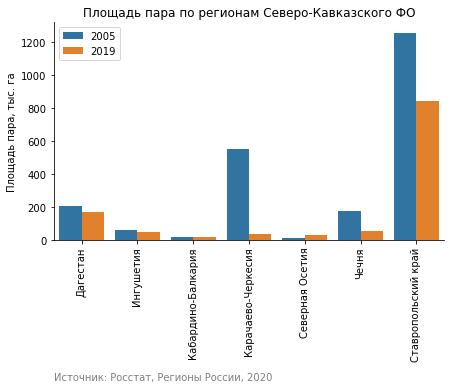

In [172]:
f, ax = plt.subplots(figsize=(7, 4))

sns.barplot(
    data = par.melt(id_vars='region'),
    x = 'region',
    y = 'value',
    hue = 'variable'
)

plt.xlabel('')
plt.ylabel('Площадь пара, тыс. га')
plt.xticks(rotation=90)

plt.legend(title='')

plt.title('Площадь пара по регионам Северо-Кавказского ФО')

ax.text(-0.5, -850, 'Источник: Росстат, Регионы России, 2020', color='grey')

sns.despine()

# plt.savefig('par.png', bbox_inches='tight', dpi=300)

### posev pashnya

In [173]:
pos_pash = pd.read_excel('agri_data.xlsx', sheet_name='posev pashnya')

In [174]:
pos_pash

,region,2005,2019
0,Дагестан,60.935115,67.602384
1,Ингушетия,47.759857,59.459459
2,Кабардино-Балкария,94.356147,94.153024
3,Карачаево-Черкесия,17.565347,79.875776
4,Северная Осетия,93.482309,84.535057
5,Чечня,48.290094,83.177851
6,Ставропольский край,68.519353,78.926839


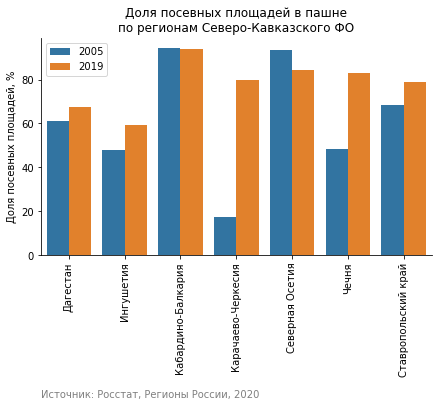

In [180]:
f, ax = plt.subplots(figsize=(7, 4))

sns.barplot(
    data = pos_pash.melt(id_vars='region'),
    x = 'region',
    y = 'value',
    hue = 'variable'
)

plt.xlabel('')
plt.ylabel('Доля посевных площадей, %')
plt.xticks(rotation=90)

plt.legend(title='')

plt.title('Доля посевных площадей в пашне\nпо регионам Северо-Кавказского ФО')

ax.text(-0.5, -65, 'Источник: Росстат, Регионы России, 2020', color='grey')

sns.despine()

# plt.savefig('pos_pash.png', bbox_inches='tight', dpi=300)

### posev structure

In [202]:
pos_str = pd.read_excel('agri_data.xlsx', sheet_name='posev_str')

In [203]:
pos_str

,region,year,Зерновые,Сахарная свекла,Подсолнечник,Лён-долгунец,Картофель,Овощи,Другое
0,Дагестан,2005,49.389289,0.000000,0.720326,0.000000,7.046665,11.713122,31.130598
1,Ингушетия,2005,66.791745,1.125704,13.133208,0.000000,5.628518,1.125704,12.195122
2,Кабардино-Балкария,2005,62.117566,0.034376,7.940873,0.000000,4.297009,5.397044,20.213132
3,Карачаево-Черкесия,2005,48.979592,5.017007,11.819728,0.000000,12.925170,1.530612,19.727891
4,Северная Осетия,2005,56.772908,0.000000,2.855246,0.132802,4.116866,2.124834,33.997344
5,Чечня,2005,63.919414,1.037851,1.587302,0.000000,1.831502,3.235653,28.388278
6,Ставропольский край,2005,71.726103,0.701549,9.997077,0.000000,1.085209,0.650395,15.839667
7,Дагестан,2019,42.576792,0.000000,1.877133,0.000000,5.403868,11.405006,38.737201
8,Ингушетия,2019,74.393939,0.000000,9.393939,0.000000,4.545455,1.060606,10.606061
9,Кабардино-Балкария,2019,75.266146,0.000000,5.251952,0.000000,2.945351,5.393896,11.142654


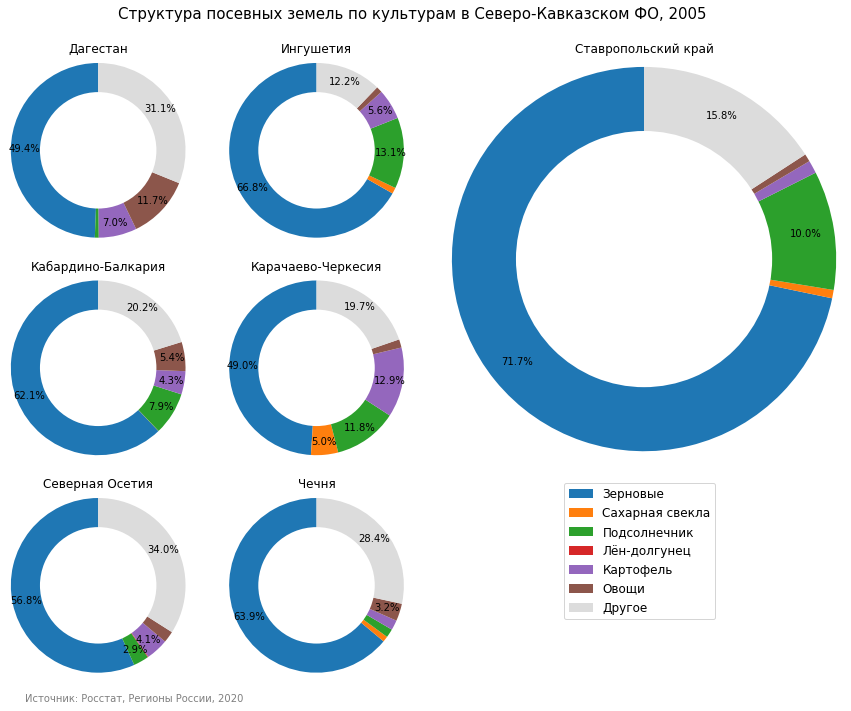

In [215]:
def smart_pct(pct, data):
    if pct > 2.5:
        return '{:.1f}%'.format(pct)
    return ''
    

def plot_pies(fig, df):
    
    for idx, (ax, region) in enumerate(zip(fig.axes, df['region'].tolist())):
        
        data = \
        [float(df.loc[df['region'] == region, :].iloc[:, 2]),
         float(df.loc[df['region'] == region, :].iloc[:, 3]),
         float(df.loc[df['region'] == region, :].iloc[:, 4]),
         float(df.loc[df['region'] == region, :].iloc[:, 5]),
         float(df.loc[df['region'] == region, :].iloc[:, 6]),
         float(df.loc[df['region'] == region, :].iloc[:, 7]),
         float(df.loc[df['region'] == region, :].iloc[:, 8]),
        ]
        
        wedges, texts, autotexts = \
        ax.pie(data,
               startangle=90,
               radius = 1.2,
               autopct = lambda pct: smart_pct(pct, data),
               pctdistance=0.85,
               colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',
                         'tab:purple', 'tab:brown', 'gainsboro']
        )
        
        ax.pie([100], colors='white', radius=0.8)
        
        ax.set_title(region)
        
        if idx == 6:
            ax.legend(wedges,
                      df.iloc[:, [2, 3, 4, 5, 6, 7, 8]].columns.tolist(),
                      loc = (0.3, -0.4),
                      fontsize=12
                     )
    

fig = plt.figure(figsize=(15, 12))

gs = GridSpec(3, 4, figure=fig, hspace=0.001, wspace=0.2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[:2, -2:])

ax5.text(-1, -1.6, 'Источник: Росстат, Регионы России, 2020', color='grey')


plot_pies(fig, pos_str.query('year == 2005'))

plt.suptitle(x=0.5, y=0.92, t='Структура посевных земель по культурам в Северо-Кавказском ФО, 2005', fontsize=15)


# plt.savefig('pos_str_2005.png', bbox_inches='tight', dpi=300)

### pos share change

In [222]:
pos_change = pd.read_excel('agri_data.xlsx', sheet_name='pos_share')

In [223]:
pos_change

,region,Зерновые,Сахарная свекла,Подсолнечник,Лён-долгунец,Картофель,Овощи
0,Дагестан,-6.812497,0.000000,1.156807,0.000000,-1.642797,-0.308117
1,Ингушетия,7.602195,-1.125704,-3.739269,0.000000,-1.083063,-0.065098
2,Кабардино-Балкария,13.148580,-0.034376,-2.688921,0.000000,-1.351658,-0.003147
3,Карачаево-Черкесия,29.091948,-1.673305,-5.210086,0.000000,-6.859851,-0.441965
4,Северная Осетия,24.932974,0.000000,-1.972893,-0.132802,-1.587454,-0.948363
5,Чечня,0.914161,-0.314262,6.842510,0.000000,0.266906,-1.028707
6,Ставропольский край,8.223843,0.419911,-0.341118,0.000000,-0.651198,-0.108673


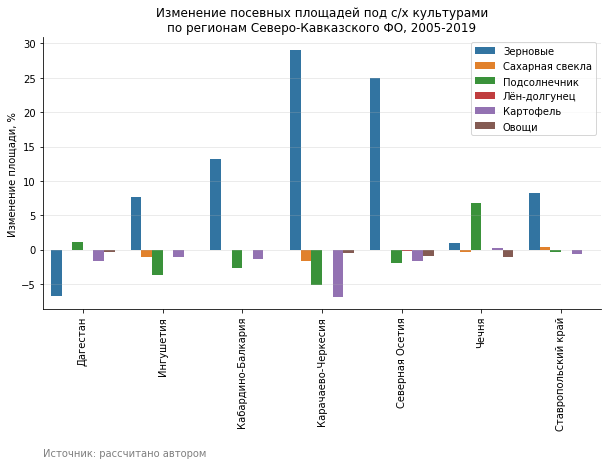

In [232]:
f, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    data = pos_change.melt(id_vars='region'),
    x = 'region',
    y = 'value',
    hue = 'variable'
)

ax.legend(title='')

plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Изменение площади, %')

plt.title('Изменение посевных площадей под с/х культурами\nпо регионам Северо-Кавказского ФО, 2005-2019')

ax.text(-0.5, -30, 'Источник: рассчитано автором', color='grey')

sns.despine()

plt.grid(axis='y', alpha=0.3)

# plt.savefig('pos_str_change.png', bbox_inches='tight', dpi=300)

### korm abs

In [233]:
korm_abs = pd.read_excel('agri_data.xlsx', sheet_name='korm abs')

In [234]:
korm_abs

,region,2005,2019
0,Дагестан,99.4,136.2
1,Ингушетия,6.5,7.0
2,Кабардино-Балкария,58.8,31.4
3,Карачаево-Черкесия,23.2,6.2
4,Северная Осетия,51.2,23.3
5,Чечня,46.5,60.0
6,Ставропольский край,433.5,261.9


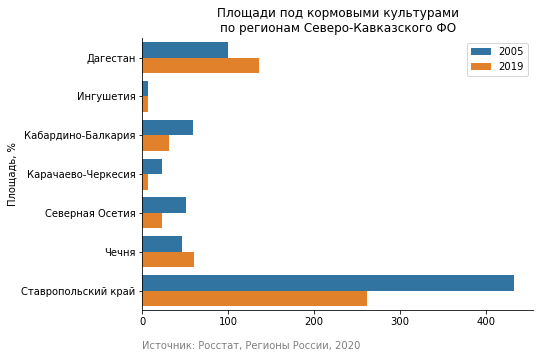

In [250]:
f, ax = plt.subplots(figsize=(7, 5))

sns.barplot(
    data = korm_abs.melt(id_vars='region'),
    x = 'value',
    y = 'region',
    hue = 'variable'
)

plt.xlabel('')
plt.ylabel('Площадь, %')

plt.legend(title='')

plt.title('Площади под кормовыми культурами\nпо регионам Северо-Кавказского ФО')

ax.text(0, 7.5, 'Источник: Росстат, Регионы России, 2020', color='grey')

sns.despine()

plt.savefig('korm_abs.png', bbox_inches='tight', dpi=300)

### korm share

In [251]:
korm_share = pd.read_excel('agri_data.xlsx', sheet_name='korm_share')

In [252]:
korm_share

,region,2005,2019
0,Дагестан,31.130598,38.737201
1,Ингушетия,12.195122,10.606061
2,Кабардино-Балкария,20.213132,11.142654
3,Карачаево-Черкесия,19.727891,4.821151
4,Северная Осетия,33.997344,13.705882
5,Чечня,28.388278,21.707670
6,Ставропольский край,15.839667,8.296902


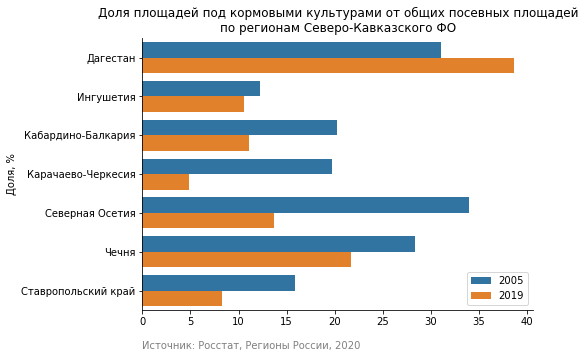

In [254]:
f, ax = plt.subplots(figsize=(7, 5))

sns.barplot(
    data = korm_share.melt(id_vars='region'),
    x = 'value',
    y = 'region',
    hue = 'variable'
)

plt.xlabel('')
plt.ylabel('Доля, %')

plt.legend(title='')

plt.title('Доля площадей под кормовыми культурами от общих посевных площадей\nпо регионам Северо-Кавказского ФО')

ax.text(0, 7.5, 'Источник: Росстат, Регионы России, 2020', color='grey')

sns.despine()

# plt.savefig('korm_share.png', bbox_inches='tight', dpi=300)